Задание: скользящие средние на биржевых графиках

Используя данные индекса РТС за последние годы
https://video.ittensive.com/python-advanced/rts-index.csv
постройте отдельные графики закрытия (Close) индекса по дням за 2017, 2018, 2019 годы в единой оси X.

Добавьте на график экспоненциальное среднее за 20 дней для значения Max за 2017 год.

Найдите последнюю дату, когда экспоненциальное среднее максимального дневного значения (Max) в 2017 году было больше, чем соответствующее значение Close в 2019 году (это последнее пересечение графика за 2019 год и графика для среднего за 2017 год).

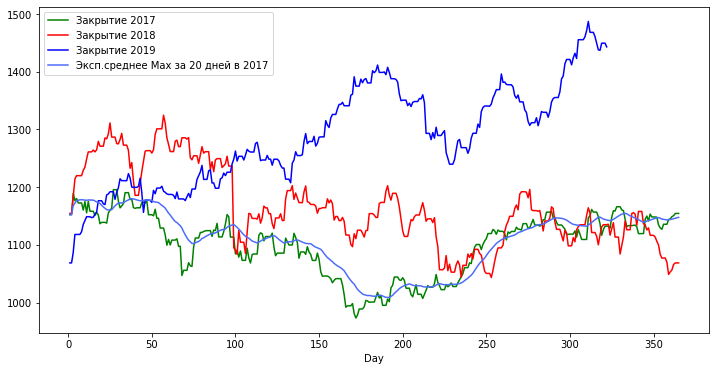

2019-02-19 00:00:00


In [9]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("https://video.ittensive.com/python-advanced/rts-index.csv")  # загрузим данные

# преобразование отечественного формата даты к западному
data["Date"] = pd.to_datetime(data["Date"], dayfirst=True)  # dayfirst - указывает с чего начинается дата (день или год)
# добавляем новую колонку Day для номера дня в году
data["Day"] = pd.to_datetime(data.index).dayofyear
dates = pd.date_range(min(data["Date"]), max(data["Date"]))  # сформируем серию из дат, начальной будет являться min(data["Date"]), а конечной max(data["Date"])
# создадим индекс
data = data.set_index("Date")
# переиндексируем данные и заполним пустые даты предыдущими значениями
# это потребуется нам для сравнения серий данных по годам, чтобы в каждый день года было хотя бы одно значение
data = data.reindex(dates).ffill() # переиндексируем данные и заполним пустые даты предыдущими значениями
# добавим еще одну серию данных день года для подписи по осям X
data["Day"] = pd.to_datetime(data.index).dayofyear
# и назначим название индекса, которое потерялось при переиндексации
data.index.name = "Date"
# теперь сортируем по индексу чтобы развернуть данные в правильном хронологическом порядке
data = data.sort_index()
# подготовим наборы данных для поиска пересечений
data_2019 = data.loc["2019"].reset_index().set_index("Day")
data_2017 = data.loc["2017"].reset_index().set_index("Day")["Max"].ewm(span=20).mean()

#постройте отдельные графики закрытия (Close) индекса по дням за 2017, 2018, 2019 годы в единой оси X.

# создадим холст 
fig = plt.figure(figsize=(12, 6))
# нанесем все требуемые линии
data.loc["2017"].reset_index().set_index("Day")["Close"].plot(color="green", label="Закрытие 2017")
data.loc["2018"].reset_index().set_index("Day")["Close"].plot(color="red", label="Закрытие 2018")
data.loc["2019"].reset_index().set_index("Day")["Close"].plot(color="blue", label="Закрытие 2019")
# Добавьте на график экспоненциальное среднее за 20 дней для значения Max за 2017 год.
data.loc["2017"].reset_index().set_index("Day")["Max"].ewm(span=20).mean().plot(color="#4D6CFA", label="Эксп.среднее Max за 20 дней в 2017")
plt.legend()  # добавим легенду
plt.show()  # выведем графики

# поиск пересечений, по графику примерно видим, что это февраль-март

# отфильтруем до того значения когда data_2019 станет больше data_2017
data_fall = data_2019[data_2019["Close"] < data_2017.loc[0:len(data_2019)]] 
# назначим индекс 
data_fall.set_index("Date", inplace=True)
# отсортируем по индексу по убыванию
data_fall = data_fall.sort_index(ascending=False)
# выведем дату пересечения взяв первый индекс
print(data_fall.index[0])